In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotnine as gg

# --- Load & filter ---
df_all = pd.read_csv("yearly_full_release_long_format.csv")


In [12]:

df_europe = df_all[
    (df_all["EU"] == 1) &
    (df_all["Continent"] == "Europe") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Unit"] == "TWh")
].copy()


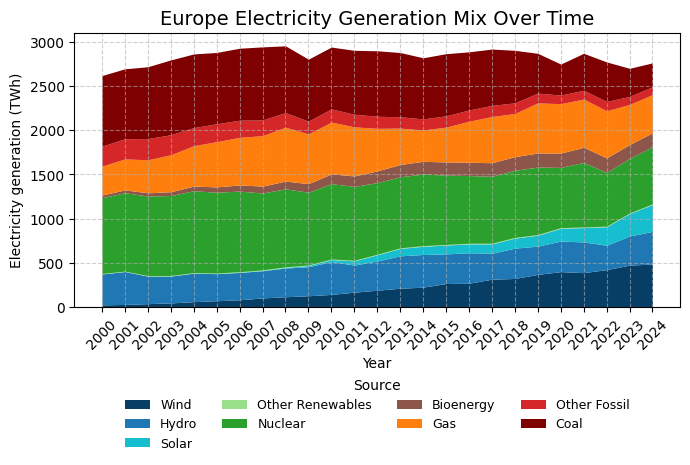

In [13]:

# --- Aggregate & pivot ---
mix_europe = df_europe.groupby(["Year", "Variable"], as_index=False)["Value"].sum()

mix_pivot_europe = (
    mix_europe
    .pivot(index="Year", columns="Variable", values="Value")
    .fillna(0)
)

# --- Desired order (clean → dirty) ---
energy_order = [
    "Wind",
    "Hydro",
    "Solar",
    "Other Renewables",
    "Nuclear",
    "Bioenergy",
    "Gas",
    "Other Fossil",
    "Coal"
]

# Keep only existing columns & reorder
energy_order = [e for e in energy_order if e in mix_pivot_europe.columns]
mix_pivot_europe = mix_pivot_europe[energy_order]

# --- Color map ---
energy_color_map = {
    "Wind": "#073e66",
    "Hydro": "#1f77b4",
    "Solar": "#17becf",
    "Other Renewables":"#98df8a",
    "Nuclear": "#2ca02c",
    "Bioenergy": "#8c564b",
    "Gas": "#ff7f0e",
    "Other Fossil": "#d62728",
    "Coal": "#7f0000"
}

colors = [energy_color_map[e] for e in mix_pivot_europe.columns]

# --- Plot ---
fig, ax = plt.subplots(figsize=(7, 5))

mix_pivot_europe.plot(
    kind="area",
    stacked=True,
    linewidth=0,
    ax=ax,
    color=colors
)

ax.set_title("Europe Electricity Generation Mix Over Time", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Electricity generation (TWh)")

ax.set_xticks(mix_pivot_europe.index)
ax.set_xticklabels(mix_pivot_europe.index, rotation=45)

ax.grid(True, axis="both", linestyle="--", alpha=0.6)

# Legend follows column order automatically
ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()


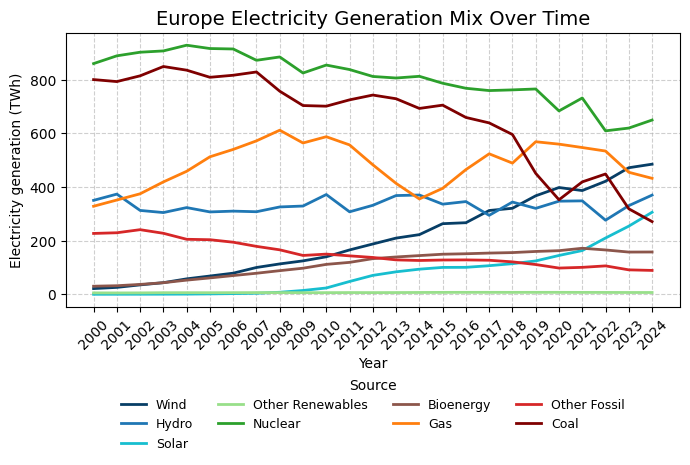

In [14]:

# --- Aggregate & pivot ---
mix_europe = df_europe.groupby(["Year", "Variable"], as_index=False)["Value"].sum()

mix_pivot_europe = (
    mix_europe
    .pivot(index="Year", columns="Variable", values="Value")
    .fillna(0)
)

# --- Desired order (clean → dirty) ---
energy_order = [
    "Wind",
    "Hydro",
    "Solar",
    "Other Renewables",
    "Nuclear",
    "Bioenergy",
    "Gas",
    "Other Fossil",
    "Coal"
]

# Keep only existing columns & reorder
energy_order = [e for e in energy_order if e in mix_pivot_europe.columns]
mix_pivot_europe = mix_pivot_europe[energy_order]

# --- Color map ---
energy_color_map = {
    "Wind": "#073e66",
    "Hydro": "#1f77b4",
    "Solar": "#17becf",
    "Other Renewables":"#98df8a",
    "Nuclear": "#2ca02c",
    "Bioenergy": "#8c564b",
    "Gas": "#ff7f0e",
    "Other Fossil": "#d62728",
    "Coal": "#7f0000"
}

colors = [energy_color_map[e] for e in mix_pivot_europe.columns]

# --- Plot ---
fig, ax = plt.subplots(figsize=(7, 5))

mix_pivot_europe.plot(
    kind="line",
    stacked=False,
    linewidth=2,
    ax=ax,
    color=colors
)

ax.set_title("Europe Electricity Generation Mix Over Time", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Electricity generation (TWh)")

ax.set_xticks(mix_pivot_europe.index)
ax.set_xticklabels(mix_pivot_europe.index, rotation=45)

ax.grid(True, axis="both", linestyle="--", alpha=0.6)

# Legend follows column order automatically
ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()


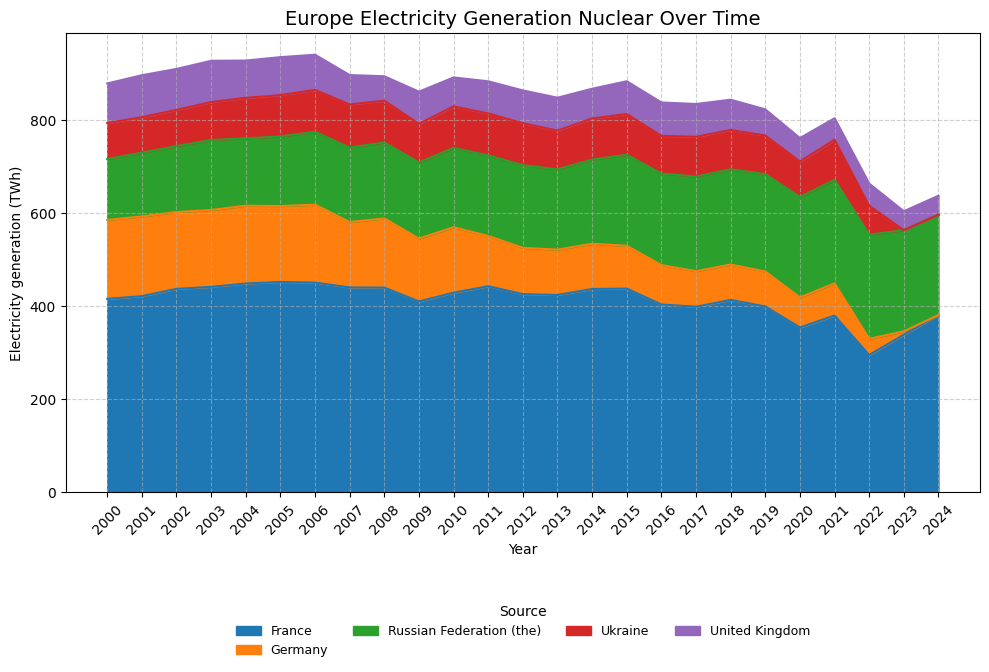

In [17]:

df_nuclear_europe = df_all[
    (df_all["Continent"] == "Europe") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Variable"] == "Nuclear") &
    (df_all["Unit"] == "TWh")
].copy()
df_nuclear_europe.head()
nuclear_comparison_europe = df_nuclear_europe.groupby(["Year", "Area"], as_index=False)["Value"].sum()
nuclear_comparison_europe.head(10)
top_5_areas_nuclear = (
    nuclear_comparison_europe
    .groupby("Area")["Value"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

nuclear_comparison_top5 = nuclear_comparison_europe[
    nuclear_comparison_europe["Area"].isin(top_5_areas_nuclear)]

mix_pivot_nuclear_Europe = (
    nuclear_comparison_top5
    .pivot(index="Year", columns="Area", values="Value")
    .fillna(0)
)

fig, ax = plt.subplots(figsize=(10, 7)) 

mix_pivot_nuclear_Europe.plot(
    kind="area",
    stacked=True,
    ax=ax
)

ax.set_title("Europe Electricity Generation Nuclear Over Time", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Electricity generation (TWh)")

ax.set_xticks(mix_pivot_nuclear_Europe.index)
ax.set_xticklabels(mix_pivot_nuclear_Europe.index, rotation=45)

ax.grid(
    True,
    axis="both",
    linestyle="--",
    alpha=0.6
)

ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,                
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()


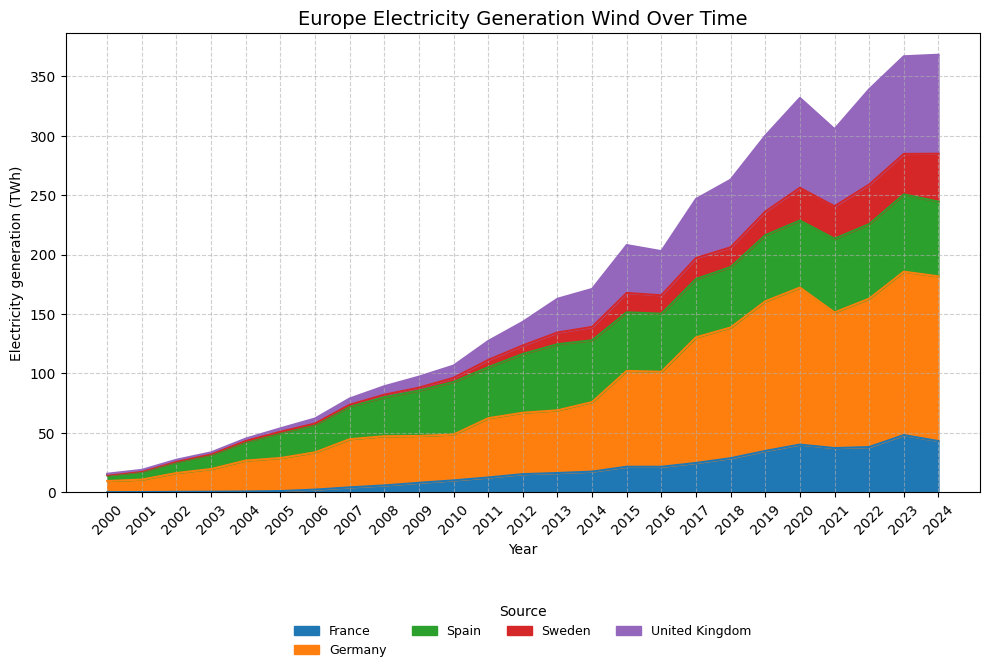

In [18]:

df_wind_europe = df_all[
    (df_all["Continent"] == "Europe") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Variable"] == "Wind") &
    (df_all["Unit"] == "TWh")
].copy()

wind_comparison_europe = df_wind_europe.groupby(["Year", "Area"], as_index=False)["Value"].sum()

top_5_areas_wind = (
    wind_comparison_europe
    .groupby("Area")["Value"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

wind_comparison_top5 = wind_comparison_europe[
    wind_comparison_europe["Area"].isin(top_5_areas_wind)]
mix_pivot_wind_Europe = (
    wind_comparison_top5
    .pivot(index="Year", columns="Area", values="Value")
    .fillna(0)
)

fig, ax = plt.subplots(figsize=(10, 7)) 

mix_pivot_wind_Europe.plot(
    kind="area",
    stacked=True,
    ax=ax
)

ax.set_title("Europe Electricity Generation Wind Over Time", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Electricity generation (TWh)")

ax.set_xticks(mix_pivot_wind_Europe.index)
ax.set_xticklabels(mix_pivot_wind_Europe.index, rotation=45)

ax.grid(
    True,
    axis="both",
    linestyle="--",
    alpha=0.6
)

ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,                
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()


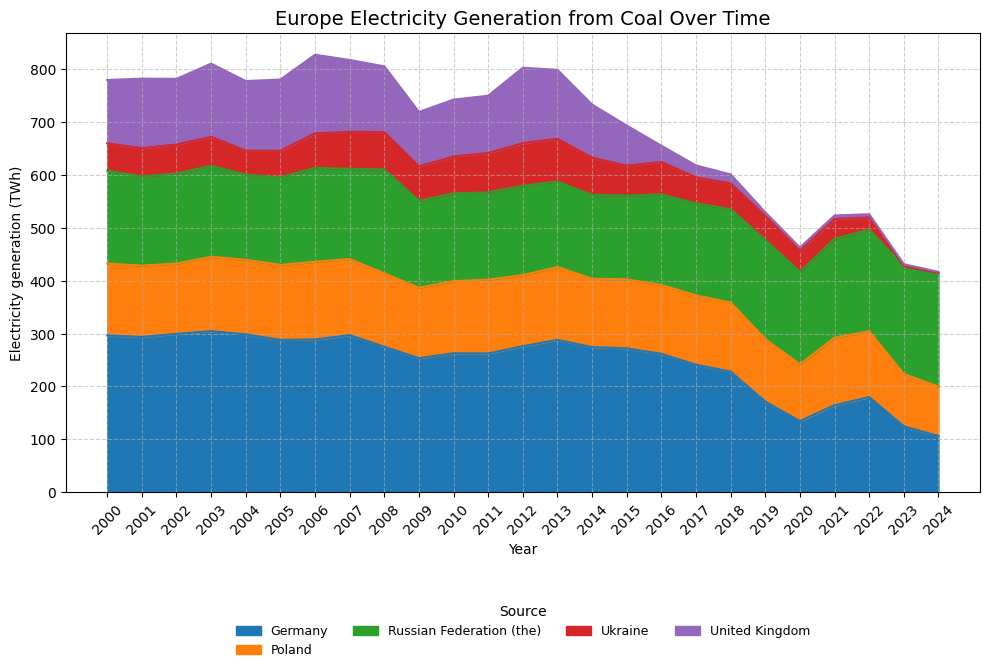

In [19]:

df_coal_europe = df_all[
    (df_all["Continent"] == "Europe") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Variable"] == "Coal") &
    (df_all["Unit"] == "TWh")
].copy()

coal_comparison_europe = df_coal_europe.groupby(["Year", "Area"], as_index=False)["Value"].sum()

top_5_areas_coals = (
    coal_comparison_europe
    .groupby("Area")["Value"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

coal_comparison_top5 = coal_comparison_europe[
    coal_comparison_europe["Area"].isin(top_5_areas_coals)]
mix_pivot_coal_Europe = (
    coal_comparison_top5
    .pivot(index="Year", columns="Area", values="Value")
    .fillna(0)
)

fig, ax = plt.subplots(figsize=(10, 7)) 

mix_pivot_coal_Europe.plot(
    kind="area",
    stacked=True,
    ax=ax
)

ax.set_title("Europe Electricity Generation from Coal Over Time", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Electricity generation (TWh)")

ax.set_xticks(mix_pivot_coal_Europe.index)
ax.set_xticklabels(mix_pivot_coal_Europe
                   .index, rotation=45)

ax.grid(
    True,
    axis="both",
    linestyle="--",
    alpha=0.6
)

ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,                
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()


In [20]:
coal_comparison_europe.groupby("Area")["Value"].sum().sort_values(ascending=False).head(10)

Area
Germany                     6145.55
Russian Federation (the)    4385.40
Poland                      3261.58
United Kingdom              2059.05
Ukraine                     1320.91
Spain                       1103.29
Czechia                     1085.01
Italy                        840.61
Serbia                       626.85
Greece                       604.63
Name: Value, dtype: float64

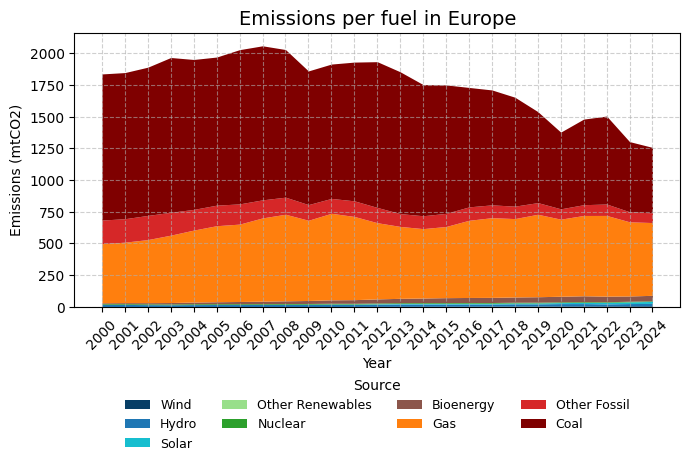

In [21]:
# --- Filter ---
df_europe_emissions = df_all[
    (df_all["Continent"] == "Europe") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Power sector emissions") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Unit"] == "mtCO2")
].copy()

# --- Aggregate & pivot ---
mix_europe_emissions = df_europe_emissions.groupby(
    ["Year", "Variable"], as_index=False
)["Value"].sum()

mix_pivot_europe_emissions = (
    mix_europe_emissions
    .pivot(index="Year", columns="Variable", values="Value")
    .fillna(0)
)

# --- Desired order (clean → dirty) ---
energy_order = [
    "Wind",
    "Hydro",
    "Solar",
    "Other Renewables",
    "Nuclear",
    "Bioenergy",
    "Gas",
    "Other Fossil",
    "Coal"
]

# Keep only existing columns & reorder
energy_order = [e for e in energy_order if e in mix_pivot_europe_emissions.columns]
mix_pivot_europe_emissions = mix_pivot_europe_emissions[energy_order]

# --- Color map (updated) ---
energy_color_map = {
    "Wind": "#073e66",
    "Hydro": "#1f77b4",
    "Solar": "#17becf",
    "Other Renewables": "#98df8a",
    "Nuclear": "#2ca02c",
    "Bioenergy": "#8c564b",
    "Gas": "#ff7f0e",
    "Other Fossil": "#d62728",
    "Coal": "#7f0000"
}

colors = [energy_color_map[e] for e in mix_pivot_europe_emissions.columns]

# --- Plot ---
fig, ax = plt.subplots(figsize=(7, 5))

mix_pivot_europe_emissions.plot(
    kind="area",
    stacked=True,
    linewidth=0,
    ax=ax,
    color=colors
)

ax.set_title("Emissions per fuel in Europe", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Emissions (mtCO2)")

ax.set_xticks(mix_pivot_europe_emissions.index)
ax.set_xticklabels(mix_pivot_europe_emissions.index, rotation=45)

ax.grid(True, axis="both", linestyle="--", alpha=0.6)

# Legend follows column order
ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()


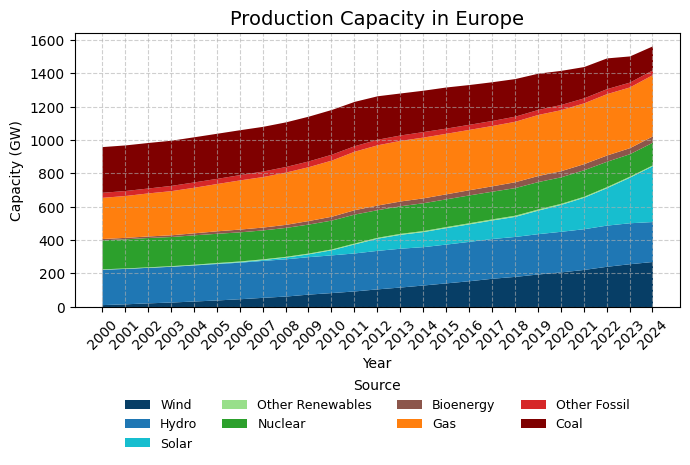

In [22]:
# --- Filter ---
df_europe_capacity = df_all[
    (df_all["Continent"] == "Europe") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Capacity") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Unit"] == "GW")
].copy()

# --- Aggregate & pivot ---
mix_europe_capacity = df_europe_capacity.groupby(
    ["Year", "Variable"], as_index=False
)["Value"].sum()

mix_pivot_europe_capacity = (
    mix_europe_capacity
    .pivot(index="Year", columns="Variable", values="Value")
    .fillna(0)
)

# --- Desired order (clean → dirty) ---
energy_order = [
    "Wind",
    "Hydro",
    "Solar",
    "Other Renewables",
    "Nuclear",
    "Bioenergy",
    "Gas",
    "Other Fossil",
    "Coal"
]

# Keep only existing columns & reorder
energy_order = [e for e in energy_order if e in mix_pivot_europe_capacity.columns]
mix_pivot_europe_capacity = mix_pivot_europe_capacity[energy_order]

# --- Color map (updated) ---
energy_color_map = {
    "Wind": "#073e66",
    "Hydro": "#1f77b4",
    "Solar": "#17becf",
    "Other Renewables": "#98df8a",
    "Nuclear": "#2ca02c",
    "Bioenergy": "#8c564b",
    "Gas": "#ff7f0e",
    "Other Fossil": "#d62728",
    "Coal": "#7f0000"
}

colors = [energy_color_map[e] for e in mix_pivot_europe_capacity.columns]

# --- Plot ---
fig, ax = plt.subplots(figsize=(7, 5))

mix_pivot_europe_capacity.plot(
    kind="area",
    stacked=True,
    linewidth=0,
    ax=ax,
    color=colors
)

ax.set_title("Production Capacity in Europe", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Capacity (GW)")

ax.set_xticks(mix_pivot_europe_capacity.index)
ax.set_xticklabels(mix_pivot_europe_capacity.index, rotation=45)

ax.grid(True, axis="both", linestyle="--", alpha=0.6)

# Legend follows column order
ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()

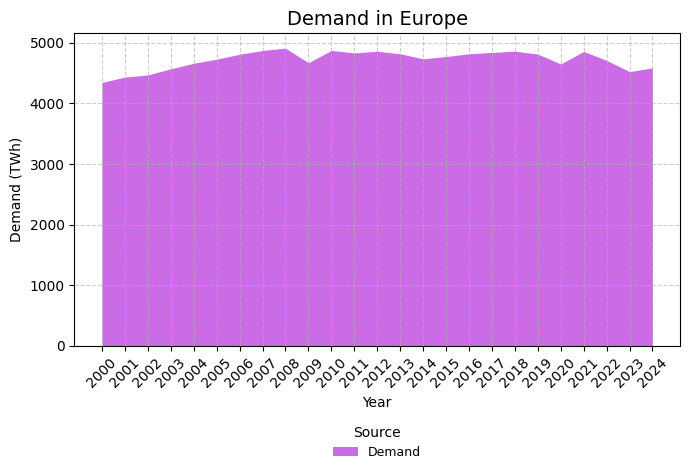

In [23]:
# --- Filter ---
df_europe_demand = df_all[
    (df_all["Continent"] == "Europe") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity demand") &
    (df_all["Subcategory"] == "Demand") &
    (df_all["Unit"] == "TWh")
].copy()

# --- Aggregate & pivot ---
europe_demand = df_europe_demand.groupby(
    ["Year", "Variable"], as_index=False
)["Value"].sum()

mix_pivot_europe_demand = (
    europe_demand
    .pivot(index="Year", columns="Variable", values="Value")
    .fillna(0)
)


# --- Plot ---
fig, ax = plt.subplots(figsize=(7, 5))

mix_pivot_europe_demand.plot(
    kind="area",
    stacked=True,
    linewidth=0,
    ax=ax,
    color= "#cb6ce6"
)

ax.set_title("Demand in Europe", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Demand (TWh)")

ax.set_xticks(mix_pivot_europe_demand.index)
ax.set_xticklabels(mix_pivot_europe_demand.index, rotation=45)

ax.grid(True, axis="both", linestyle="--", alpha=0.6)

# Legend follows column order
ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()

Per confrontare capacità e generazione: quantifichiamo la crescita percentuale delle 2 metriche negli anni: 2000 = 0 % confrontiamo raggruppando: Wind, Hydro Solar = renewables. Nuclear = Clean. Fossil

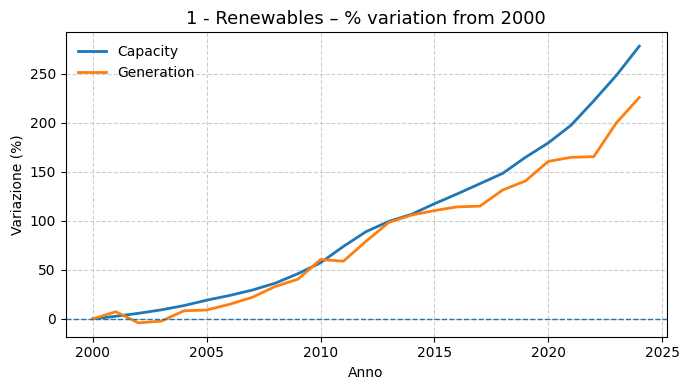

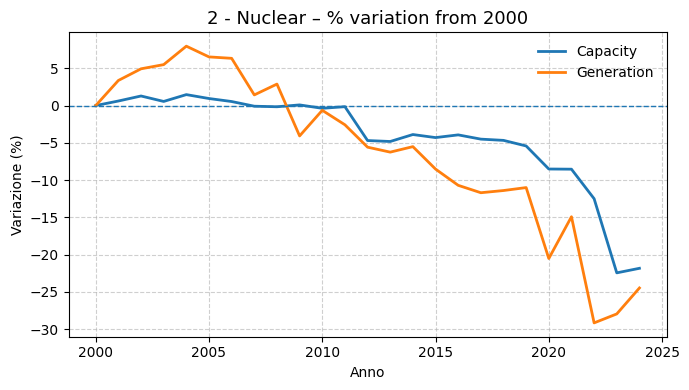

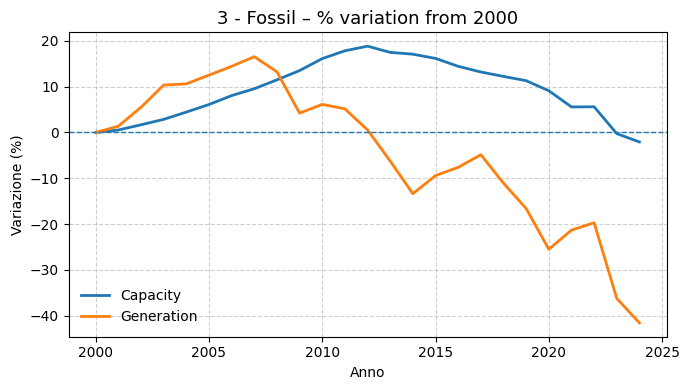

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. CAPACITÀ – filtro solo GW e aggrego a livello EU
df_europe_capacity_gw = df_europe_capacity[
    df_europe_capacity["Unit"] == "GW"
].copy()

cap_eu = (
    df_europe_capacity_gw
    .groupby(["Year", "Variable"], as_index=False)["Value"]
    .sum()
)

# 2. PRODUZIONE – filtro solo TWh e aggrego a livello EU
df_europe_prod_twh = df_europe[
    df_europe["Unit"] == "TWh"
].copy()

prod_eu = (
    df_europe_prod_twh
    .groupby(["Year", "Variable"], as_index=False)["Value"]
    .sum()
)

# 3. Mappo i fuel nei tre gruppi: Renewables / Clean / Fossil
fuel_to_group = {
    "Wind": "1 - Renewables",
    "Hydro": "1 - Renewables",
    "Solar": "1 - Renewables",
    "Other Renewables": "1 - Renewables",
    "Bioenergy": "1 - Renewables",
    "Nuclear": "2 - Nuclear",
    # tutto ciò che non è in questo dizionario verrà messo in "Fossil"
}

cap_eu["Category"] = cap_eu["Variable"].map(fuel_to_group).fillna("3 - Fossil")
prod_eu["Category"] = prod_eu["Variable"].map(fuel_to_group).fillna("3 - Fossil")

# 4. Aggrego per Year + Category (Renewables / Clean / Fossil)
cap_cat = (
    cap_eu
    .groupby(["Year", "Category"], as_index=False)["Value"]
    .sum()
)

prod_cat = (
    prod_eu
    .groupby(["Year", "Category"], as_index=False)["Value"]
    .sum()
)

# 5. Funzione generica per la variazione % dal 2000
def percent_change_from_2000(df, level_col="Category", base_year=2000):
    # prendo i valori dell'anno base e li aggrego per categoria
    base = (
        df[df["Year"] == base_year]
        .groupby(level_col)["Value"]
        .sum()
    )

    df = df.copy()
    df["Base_2000"] = df[level_col].map(base)
    df["Pct_change"] = (df["Value"] / df["Base_2000"] - 1) * 100

    return df

# 6. Calcolo variazioni % per capacità e generazione
capacity_pct = percent_change_from_2000(cap_cat, level_col="Category")
production_pct = percent_change_from_2000(prod_cat, level_col="Category")

capacity_pct["Metric"] = "Capacity"
production_pct["Metric"] = "Generation"

df_pct = pd.concat([capacity_pct, production_pct], ignore_index=True)

# 7. Grafici: confronto capacità vs generazione per ogni gruppo
categories = ["1 - Renewables", "2 - Nuclear", "3 - Fossil"]

for cat in categories:
    df_cat = df_pct[df_pct["Category"] == cat]

    fig, ax = plt.subplots(figsize=(7, 4))

    for metric in ["Capacity", "Generation"]:
        df_m = (
            df_cat[df_cat["Metric"] == metric]
            .sort_values("Year")
        )

        # se non c'è baseline per il 2000, salto
        if df_m["Base_2000"].isna().all():
            continue

        ax.plot(
            df_m["Year"],
            df_m["Pct_change"],
            label=metric,
            linewidth=2
        )

    ax.axhline(0, linestyle="--", linewidth=1)
    ax.set_title(f"{cat} – % variation from 2000", fontsize=13)
    ax.set_xlabel("Anno")
    ax.set_ylabel("Variazione (%)")

    ax.grid(True, axis="both", linestyle="--", alpha=0.6)
    ax.legend(frameon=False)

    plt.tight_layout()
    plt.show()

Per confrontare capacità e generazione: quantifichiamo la crescita percentuale delle 2 metriche negli anni: 2000 = 0 % confrontiamo raggruppando: Wind, Hydro Solar = renewables. Nuclear = Clean. Fossil

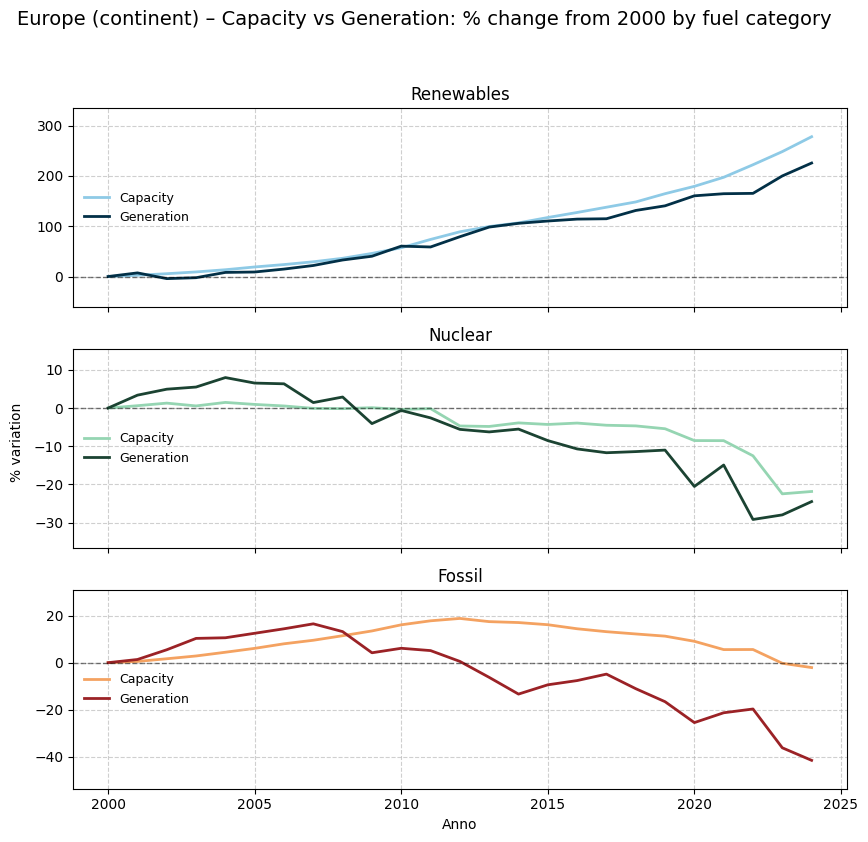

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. CAPACITÀ – filtro solo GW e aggrego a livello EU
df_europe_capacity_gw = df_europe_capacity[
    df_europe_capacity["Unit"] == "GW"
].copy()

cap_eu = (
    df_europe_capacity_gw
    .groupby(["Year", "Variable"], as_index=False)["Value"]
    .sum()
)

# 2. PRODUZIONE – filtro solo TWh e aggrego a livello EU
df_europe_prod_twh = df_europe[
    df_europe["Unit"] == "TWh"
].copy()

prod_eu = (
    df_europe_prod_twh
    .groupby(["Year", "Variable"], as_index=False)["Value"]
    .sum()
)

# 3. Mappo i fuel nei tre gruppi: Renewables / Nuclear / Fossil
fuel_to_group = {
    "Wind": "Renewables",
    "Hydro": "Renewables",
    "Solar": "Renewables",
    "Other Renewables": "Renewables",
    "Bioenergy": "Renewables",
    "Nuclear": "Nuclear",
}

cap_eu["Category"] = cap_eu["Variable"].map(fuel_to_group).fillna("Fossil")
prod_eu["Category"] = prod_eu["Variable"].map(fuel_to_group).fillna("Fossil")

# 4. Aggrego per Year + Category
cap_cat = (
    cap_eu
    .groupby(["Year", "Category"], as_index=False)["Value"]
    .sum()
)

prod_cat = (
    prod_eu
    .groupby(["Year", "Category"], as_index=False)["Value"]
    .sum()
)

# 5. Funzione per la variazione % dal 2000
def percent_change_from_2000(df, level_col="Category", base_year=2000):
    base = (
        df[df["Year"] == base_year]
        .groupby(level_col)["Value"]
        .sum()
    )

    df = df.copy()
    df["Base_2000"] = df[level_col].map(base)
    df["Pct_change"] = (df["Value"] / df["Base_2000"] - 1) * 100

    return df

# 6. Calcolo variazioni %
capacity_pct = percent_change_from_2000(cap_cat)
production_pct = percent_change_from_2000(prod_cat)

capacity_pct["Metric"] = "Capacity"
production_pct["Metric"] = "Generation"

df_pct = pd.concat([capacity_pct, production_pct], ignore_index=True)

# 7. Color coding
color_map = {
    ("Renewables", "Capacity"):   "#8ecae6",
    ("Renewables", "Generation"): "#023047",
    ("Nuclear", "Capacity"):      "#95d5b2",
    ("Nuclear", "Generation"):    "#1b4332",
    ("Fossil", "Capacity"):       "#f4a261",
    ("Fossil", "Generation"):     "#9b2226",
}

categories = ["Renewables", "Nuclear", "Fossil"]

# 8. Small multiples con Y indipendente + legenda interna
fig, axes = plt.subplots(
    nrows=3, ncols=1,
    figsize=(9, 9),
    sharex=True,
    sharey=False
)

for ax, cat in zip(axes, categories):
    df_cat = df_pct[df_pct["Category"] == cat]

    for metric in ["Capacity", "Generation"]:
        df_m = (
            df_cat[df_cat["Metric"] == metric]
            .sort_values("Year")
        )

        if df_m.empty or df_m["Base_2000"].isna().all():
            continue

        ax.plot(
            df_m["Year"],
            df_m["Pct_change"],
            label=metric,
            linewidth=2,
            color=color_map[(cat, metric)]
        )

    # baseline
    ax.axhline(0, linestyle="--", linewidth=1, color="black", alpha=0.5)

    ax.set_title(cat, fontsize=12)
    ax.grid(True, axis="both", linestyle="--", alpha=0.6)

    # zoom automatico per categoria
    yvals = df_cat["Pct_change"].dropna()
    if not yvals.empty:
        ymin, ymax = yvals.min(), yvals.max()
        ymin = min(ymin, 0)
        ymax = max(ymax, 0)
        pad = (ymax - ymin) * 0.2 if ymax != ymin else 10
        ax.set_ylim(ymin - pad, ymax + pad)

    # ⭐ LEGENDA INTERNA (in basso a destra)
    ax.legend(
        loc="center left",
        frameon=False,
        fontsize=9
    )

# etichette comuni
axes[-1].set_xlabel("Anno")
fig.text(
    0.04, 0.5,
    "% variation",
    va="center",
    rotation="vertical"
)

fig.suptitle(
    "Europe (continent) – Capacity vs Generation: % change from 2000 by fuel category",
    fontsize=14,
    y=0.98
)

plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.show()


In [ ]:
df_europe_capacity_gw = df_europe_capacity[
    df_europe_capacity["Unit"] == "GW"
].copy()

cap_eu = (
    df_europe_capacity_gw
    .groupby(["Year", "Variable"], as_index=False)["Value"]
    .sum()
)

# Produzione: filtro unità e aggrego
df_europe_prod_twh = df_europe[
    df_europe["Unit"] == "TWh"
].copy()

prod_eu = (
    df_europe_prod_twh
    .groupby(["Year", "Variable"], as_index=False)["Value"]
    .sum()
)

In [ ]:
def percent_change_from_2000(df, base_year=2000):
    base = (
        df[df["Year"] == base_year]
        .set_index("Variable")["Value"]
    )

    df = df.copy()
    df["Base_2000"] = df["Variable"].map(base)
    df["Pct_change"] = (df["Value"] / df["Base_2000"] - 1) * 100

    return df

In [ ]:
capacity_pct = percent_change_from_2000(df_europe_capacity_gw)
production_pct = percent_change_from_2000(df_europe_prod_twh)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

Per confrontare capacità e generazione: quantifichiamo la crescita percentuale delle 2 metriche negli anni: 2000 = 0 % confrontiamo raggruppando: Wind, Hydro Solar = renewables. Nuclear = Clean. Fossil

In [ ]:
df_europe_capacity_gw = df_europe_capacity[
    df_europe_capacity["Unit"] == "GW"
].copy()

cap_eu = (
    df_europe_capacity_gw
    .groupby(["Year", "Variable"], as_index=False)["Value"]
    .sum()
)

# Produzione: filtro unità e aggrego
df_europe_prod_twh = df_europe[
    df_europe["Unit"] == "TWh"
].copy()

prod_eu = (
    df_europe_prod_twh
    .groupby(["Year", "Variable"], as_index=False)["Value"]
    .sum()
)

In [ ]:
def percent_change_from_2000(df, base_year=2000):
    base = (
        df[df["Year"] == base_year]
        .set_index("Variable")["Value"]
    )

    df = df.copy()
    df["Base_2000"] = df["Variable"].map(base)
    df["Pct_change"] = (df["Value"] / df["Base_2000"] - 1) * 100

    return df

In [ ]:
capacity_pct = percent_change_from_2000(df_europe_capacity_gw)
production_pct = percent_change_from_2000(df_europe_prod_twh)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects